# Visualizations

* [Cross Validation](#Cross-Validation)
* [Feature Importance](#Feature-Importance)
* [Distribution](#Distribution)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

In [34]:
teledf=pd.read_csv('data/teledf_final.csv', index_col=0)
teledf.head()

,Total day charge,Total intl calls,Area code_415,Area code_510,Total eve minutes,Total day minutes,Total day calls,Voice mail plan,Area code_408,Customer service calls,International plan,Churn,Number vmail messages,Total intl minutes,Total intl charge,Total eve charge
0,45.07,3.0,1.0,0.0,197.4,265.1,110.0,1.0,0.0,1.0,0.0,0.0,25.0,10.0,2.70,16.78
1,27.47,3.0,1.0,0.0,195.5,161.6,123.0,1.0,0.0,1.0,0.0,0.0,26.0,13.7,3.70,16.62
2,41.38,5.0,1.0,0.0,121.2,243.4,114.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,3.29,10.30
3,50.90,7.0,0.0,0.0,61.9,299.4,71.0,0.0,1.0,2.0,1.0,0.0,0.0,6.6,1.78,5.26
4,28.34,3.0,1.0,0.0,148.3,166.7,113.0,0.0,0.0,3.0,1.0,0.0,0.0,10.1,2.73,12.61


In [ ]:
X=teledf.drop(columns='Churn')
y=teledf['Churn']

X_rest, X_test, y_rest, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val=train_test_split(X_rest, y_rest, test_size=0.2, random_state=42)

In [13]:
balancer = RandomOverSampler(random_state = 42)

X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)

In [14]:
xgb_final = XGBClassifier(colsample_bytree=0.8,
                          gamma=0.1,
                          learning_rate=0.1,
                          max_depth=6,
                          min_child_weight=1,
                          early_stopping_rounds=10, booster='gbtree', random_state=42, )

In [15]:
xgb_final.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=10, gamma=0.1, learning_rate=0.1,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

Text(0.5, 1.0, 'Confusion Matrix for Final XGBoost')

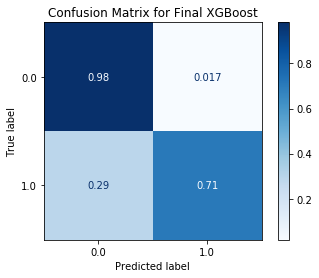

In [18]:
plot_confusion_matrix(xgb_final, 
                      X_test,
                      y_test,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Final XGBoost')

# Feature Importance

In [19]:
feature_coef=pd.DataFrame(data=[X_train.columns, xgb_final.feature_importances_]).transpose()

In [20]:
top_five_features=feature_coef.sort_values(by=[1], ascending=False)[:5]
top_five_features

,0,1
10,International plan,0.203274
9,Customer service calls,0.195362
0,Total day charge,0.0837647
7,Voice mail plan,0.0772994
12,Total intl minutes,0.0564935


Text(0.5, 1.0, 'Most Important Features in Model')

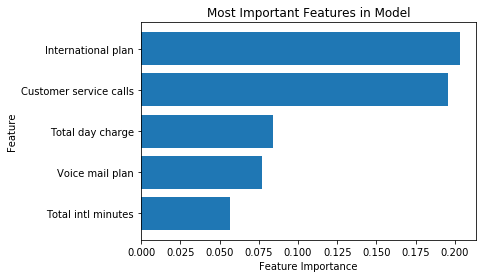

In [37]:
plt.barh(y=top_five_features[0], width = top_five_features[1])

plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Most Important Features in Model')

# Distribution

In [36]:
# datasets for churned and unchurned

churned = teledf[teledf['Churn']==0.0]
unchurned = teledf[teledf['Churn']==1.0]

churned.shape, unchurned.shape

((2850, 16), (483, 16))

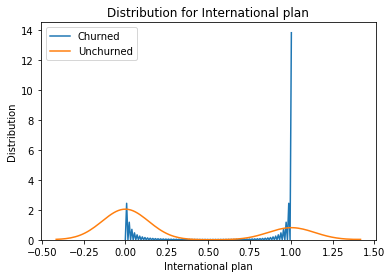

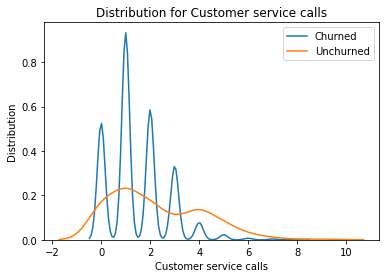

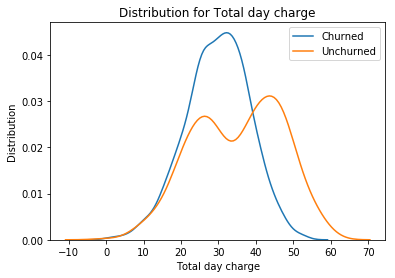

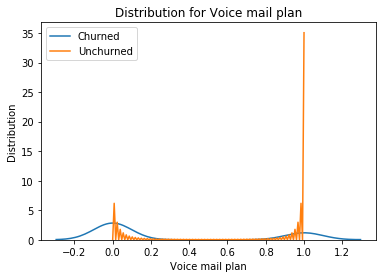

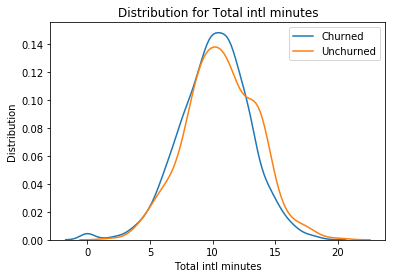

In [41]:
for i in top_five_features[0]:
    sns.distplot(churned[i], hist = False, label = 'Churned')
    sns.distplot(unchurned[i], hist = False, label = 'Unchurned')
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.title(f'Distribution for {i}')
    plt.show()

In [49]:
for i in top_five_features[0]:
    print(f'{i}:', '\n', 
          f'Churned Mean: {churned[i].mean()}' , '\n',
          f'Unchurned Mean: {unchurned[i].mean()}')

International plan: 
 Churned Mean: 0.06526315789473684 
 Unchurned Mean: 0.2836438923395445
Customer service calls: 
 Churned Mean: 1.4498245614035088 
 Unchurned Mean: 2.229813664596273
Total day charge: 
 Churned Mean: 29.780421052631574 
 Unchurned Mean: 35.175921325051775
Voice mail plan: 
 Churned Mean: 0.29543859649122806 
 Unchurned Mean: 0.16563146997929606
Total intl minutes: 
 Churned Mean: 10.158877192982455 
 Unchurned Mean: 10.699999999999994


Total intl minutes is ultimately an unmeaningful variable. Drop from final presentation.